<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
path = "/Users/Naren/GitHub/projects/project-two/sat_scores.csv"
doc = csv.DictReader(open(path, 'rb'))
dict_list = []

for line in doc:
    dict_list.append(line)

dict_list

path = "/Users/Naren/GitHub/projects/project-two/sat_scores.csv"
dict_items = []
with open(path, 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        dict_items.append(row)

item_list = []
holder = [0] * len(dict_items[0])

for a in range(len(dict_items[0])) :

    for b in range(1,len(dict_items)) :
        values_list = dict_items[b][a]
        item_list.append(values_list)

    holder[a] = item_list
    item_list = []

dictionary = dict(zip(dict_items[0], holder))
pprint(dictionary)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sats = pd.DataFrame(dictionary)
sats

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520
5,499,71,RI,501
6,499,71,PA,500
7,506,69,VT,511
8,500,69,ME,506
9,501,68,VA,510


In [5]:
sats1 = pd.read_csv(path)
sats1

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
print sats.dtypes

print sats1.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sats1.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
sats_dict = {}

sats_dict["State"] = [sats1.dtypes["State"], "Object"]
sats_dict["Rate"] = [sats1.dtypes["Rate"], "Integer"]
sats_dict["Verbal"] = [sats1.dtypes["Verbal"], "Integer"]
sats_dict["Math"] = [sats1.dtypes["Math"], " Integer"]
sats_dict["Shape"] = [("The shape is", str(sats1.shape))]

sats_dict

{'Math': [dtype('int64'), ' Integer'],
 'Rate': [dtype('int64'), 'Integer'],
 'Shape': [('The shape is', '(52, 4)')],
 'State': [dtype('O'), 'Object'],
 'Verbal': [dtype('int64'), 'Integer']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

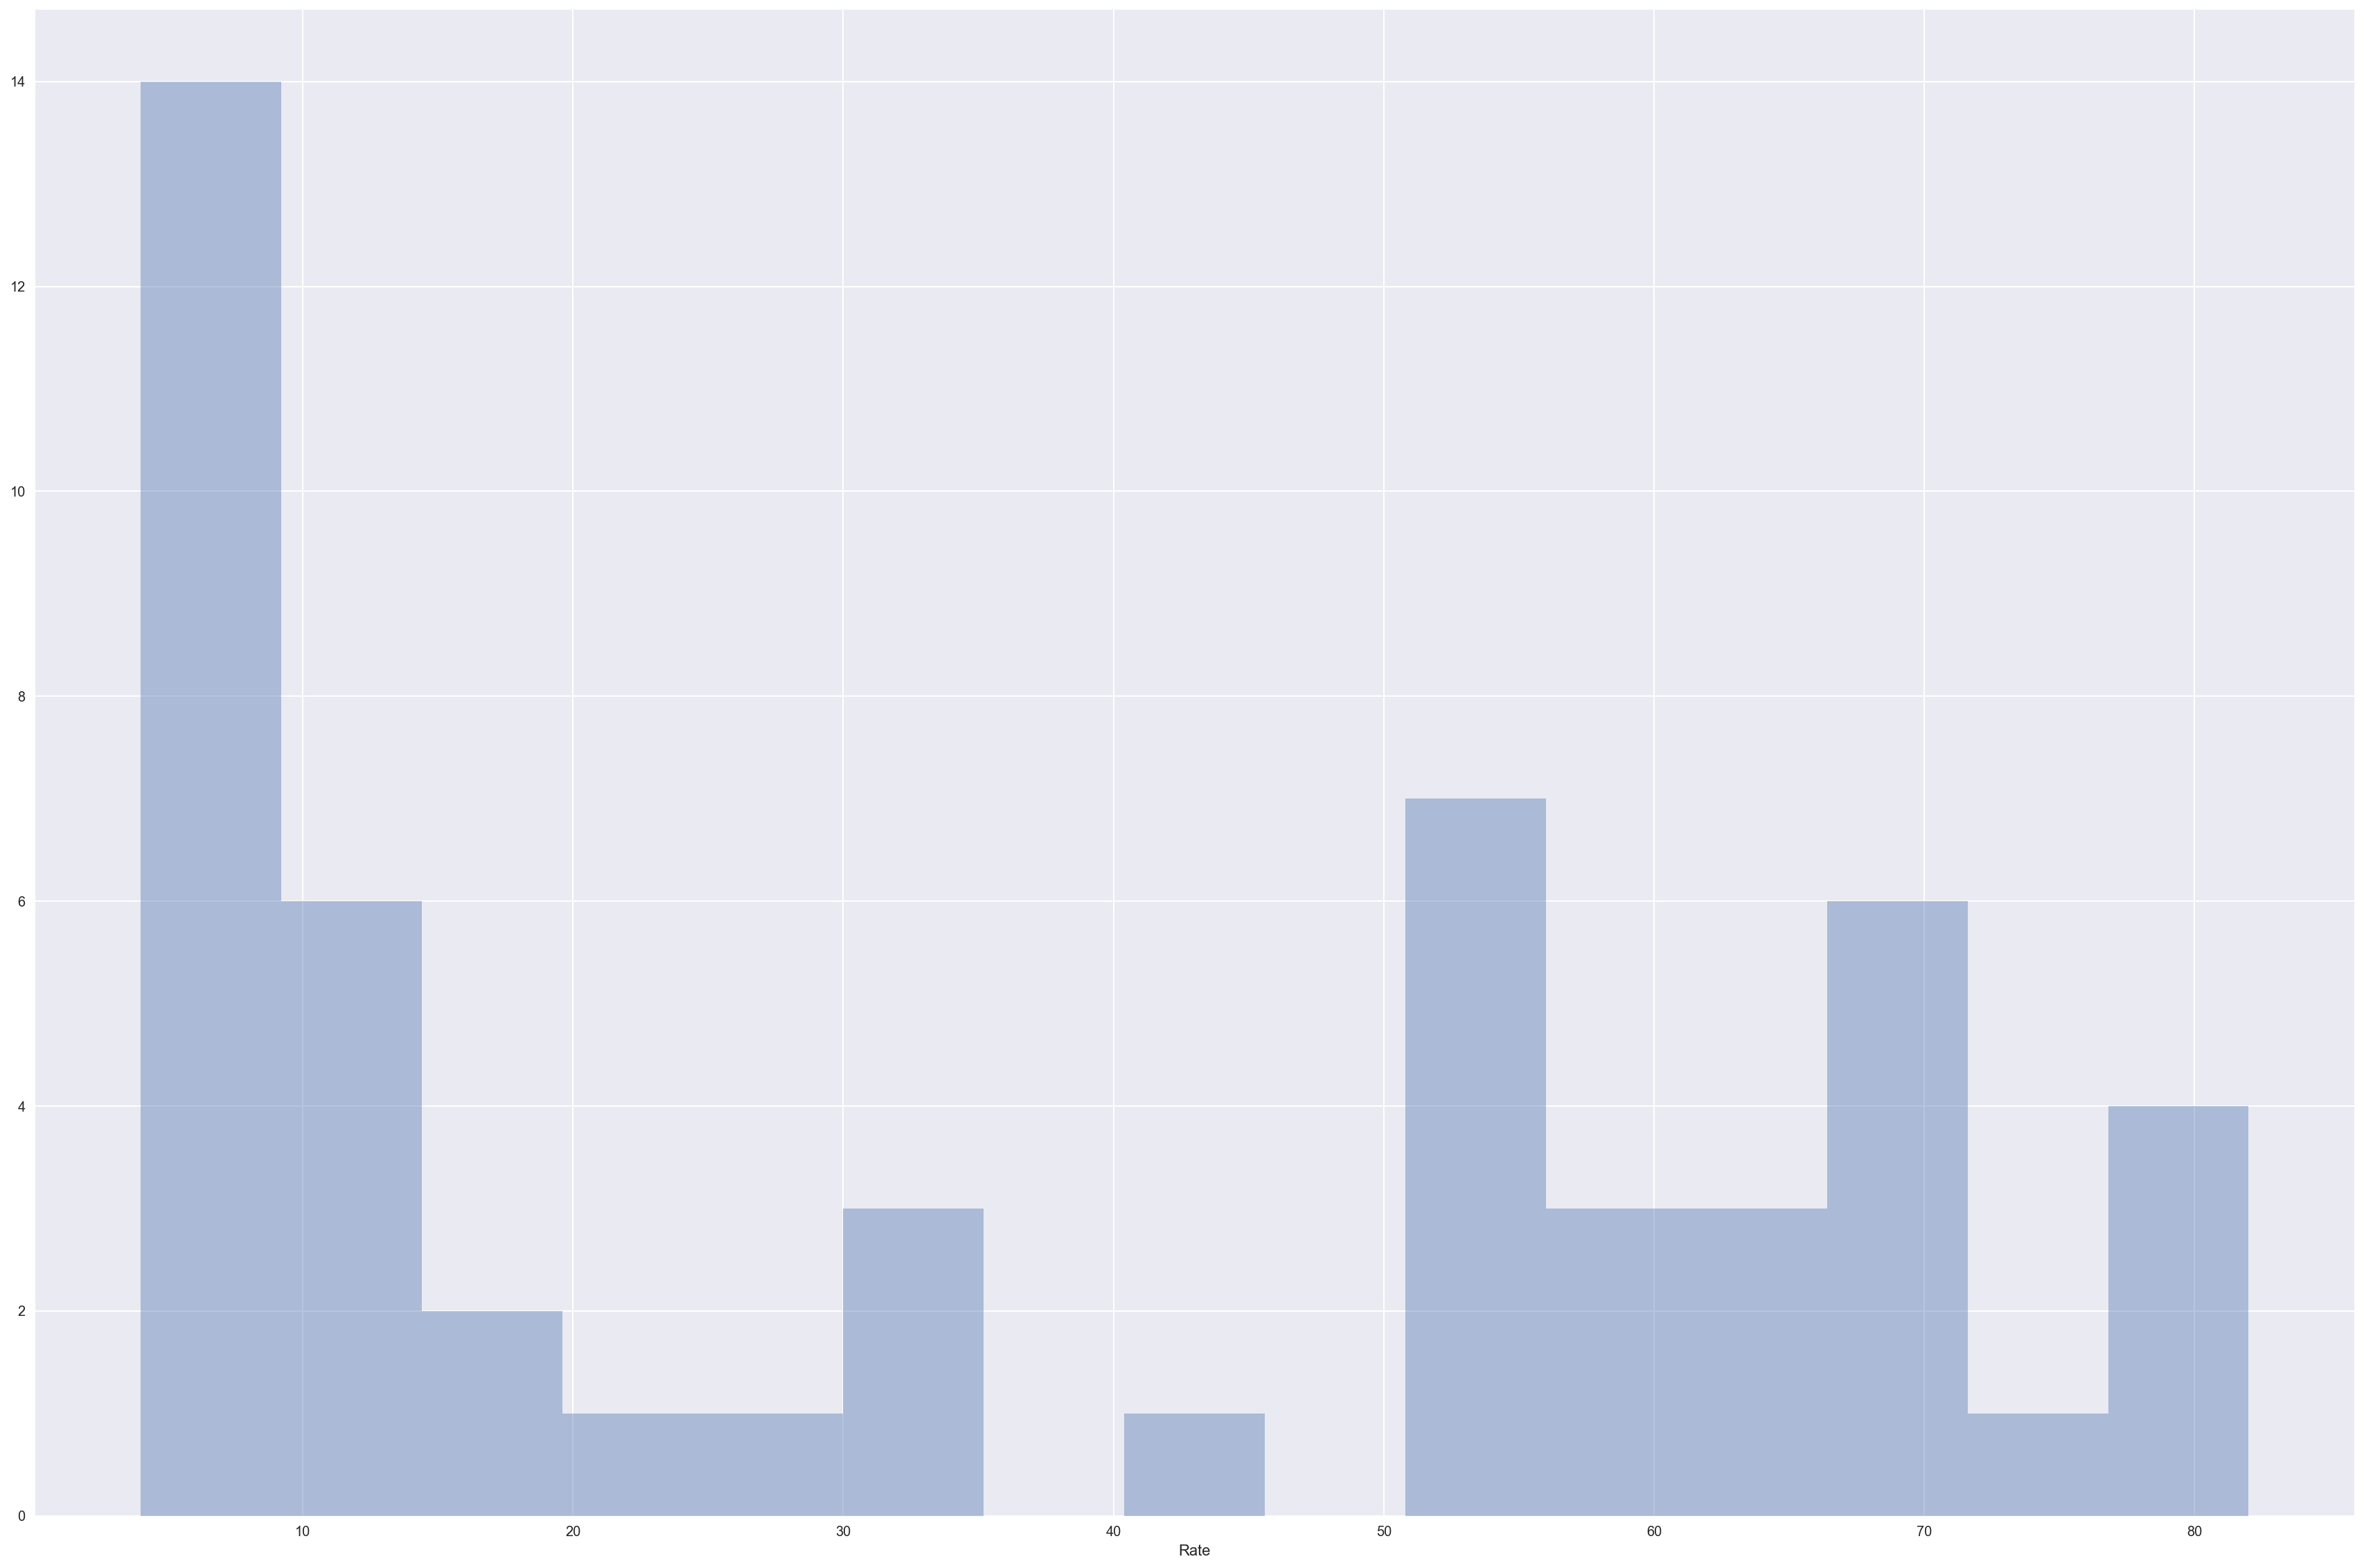

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(30,20))
sns.distplot(sats1.Rate, kde=False,bins = 15, hist=True)

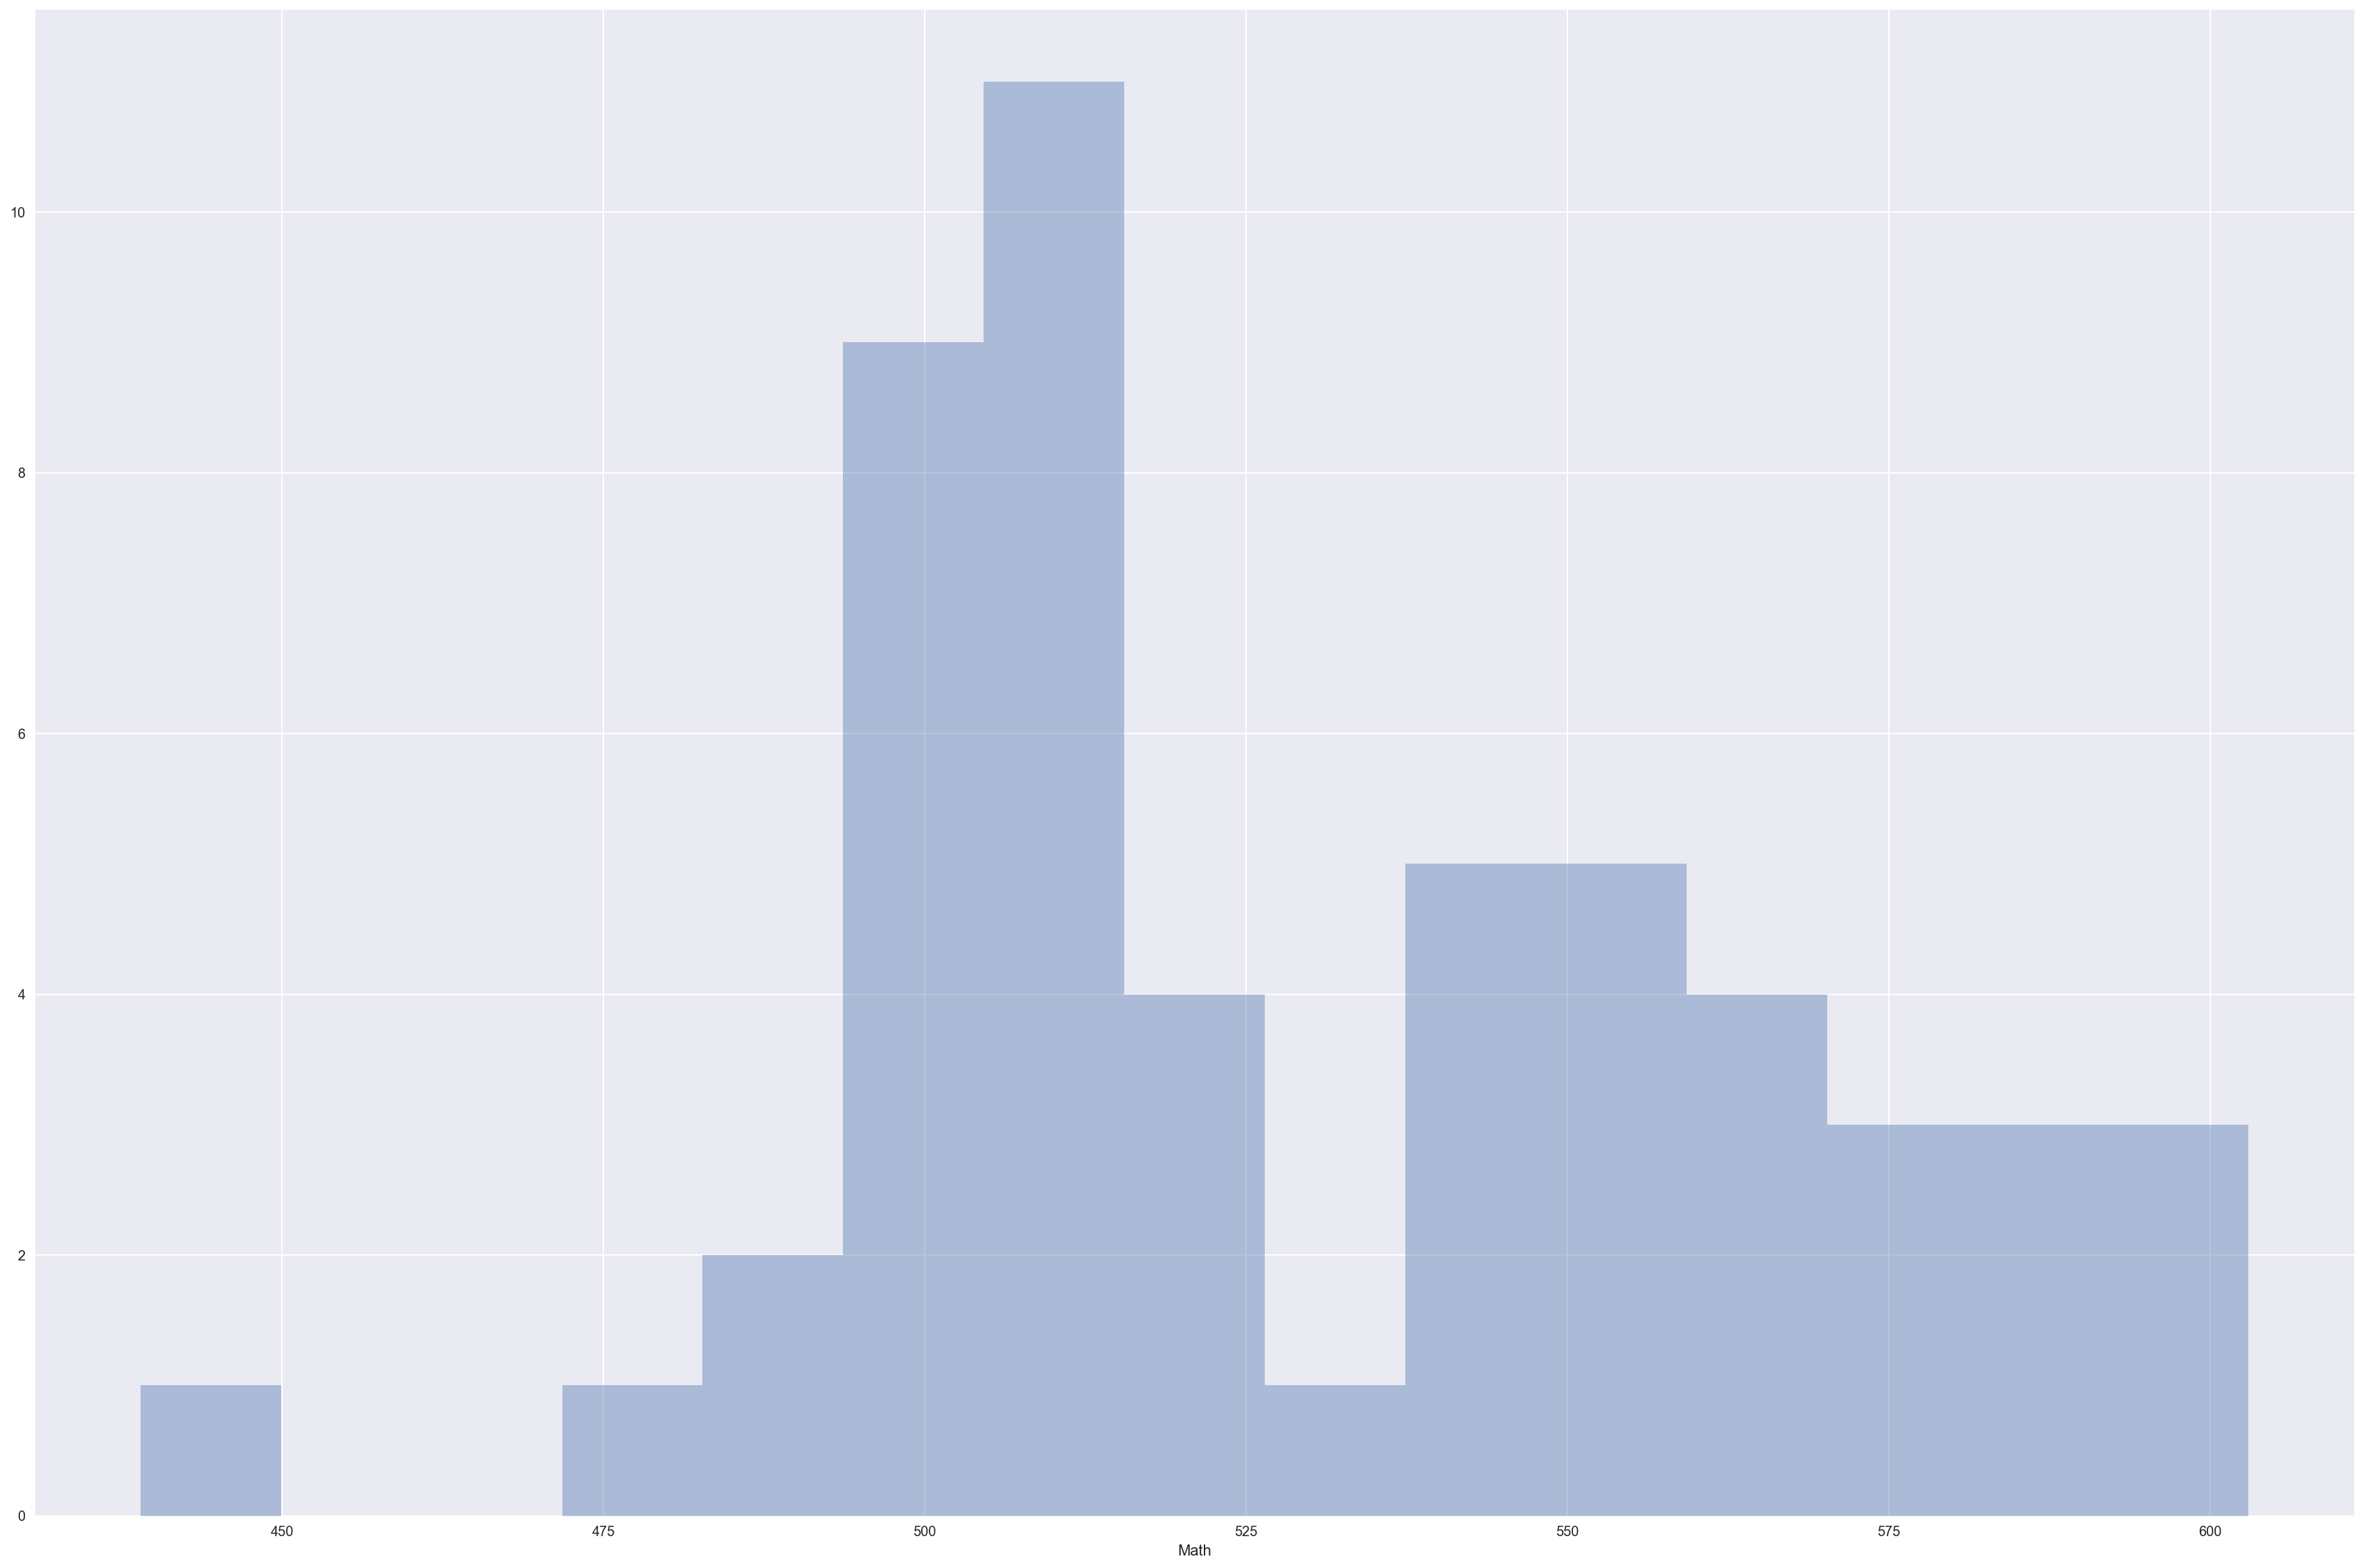

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(30,20))
sns.distplot(sats1.Math, kde=False,bins = 15 ,hist=True)

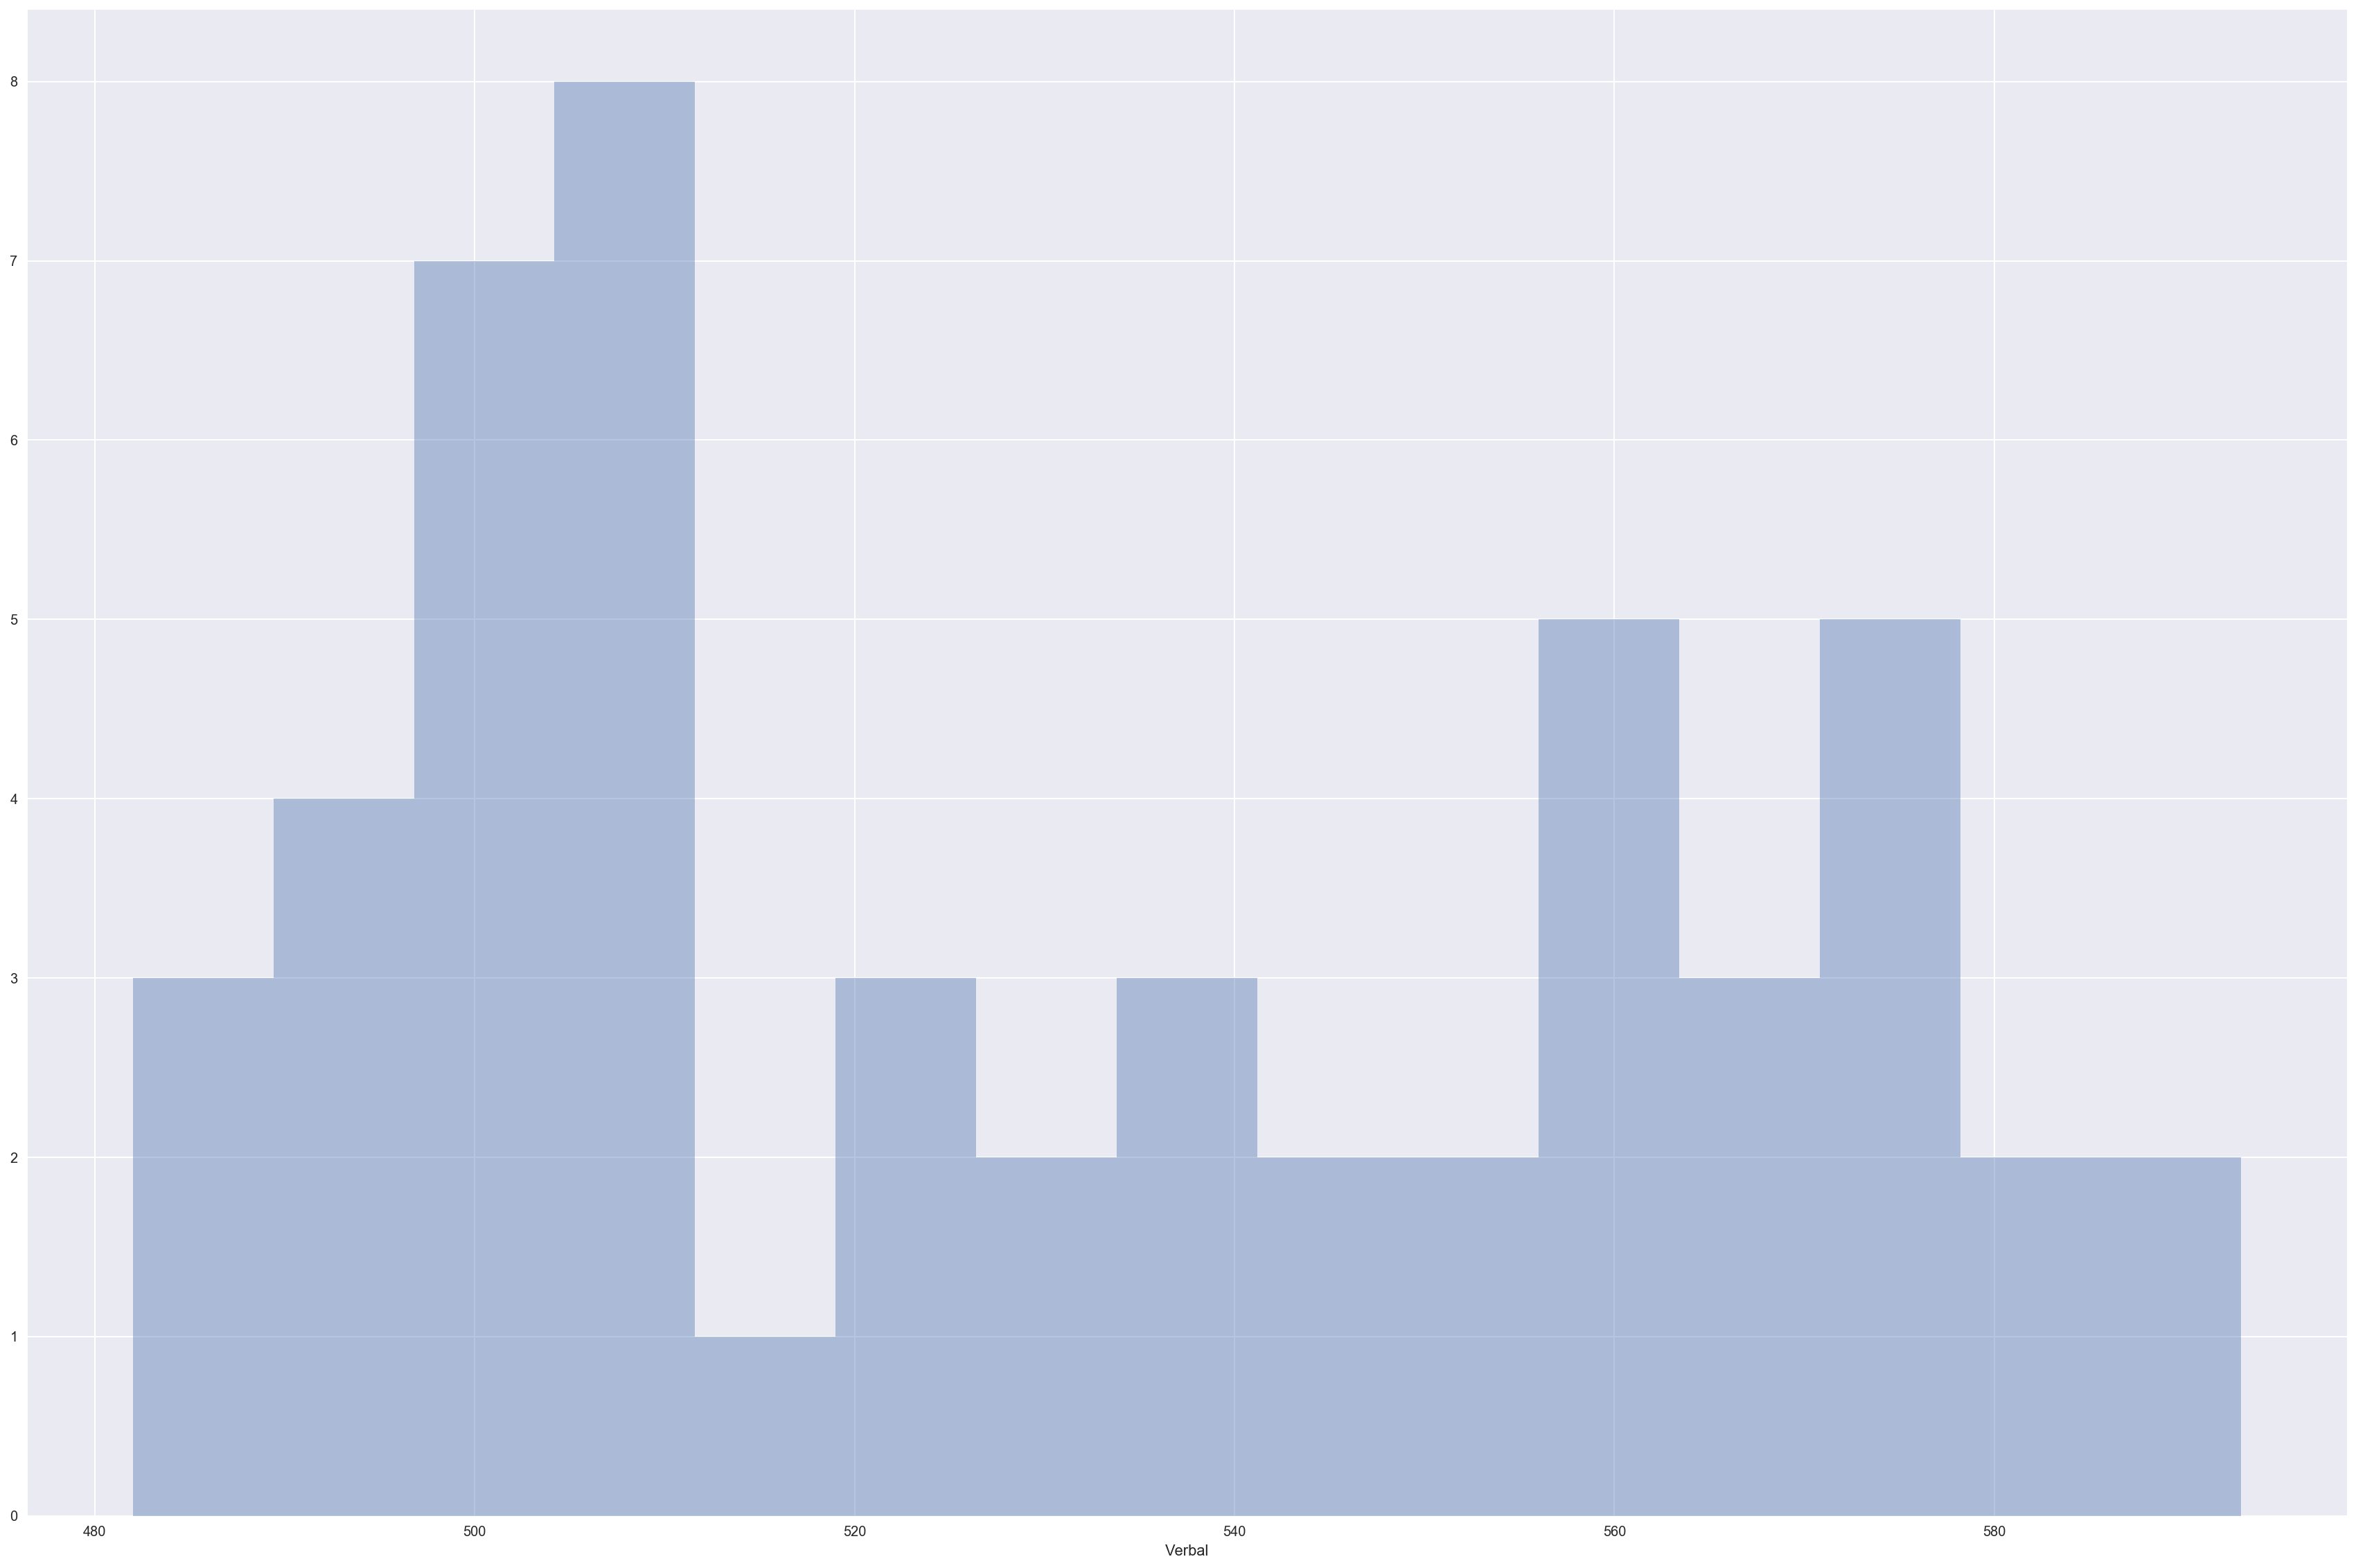

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(30,20))
sns.distplot(sats1.Verbal, kde=False,bins = 15, hist=True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

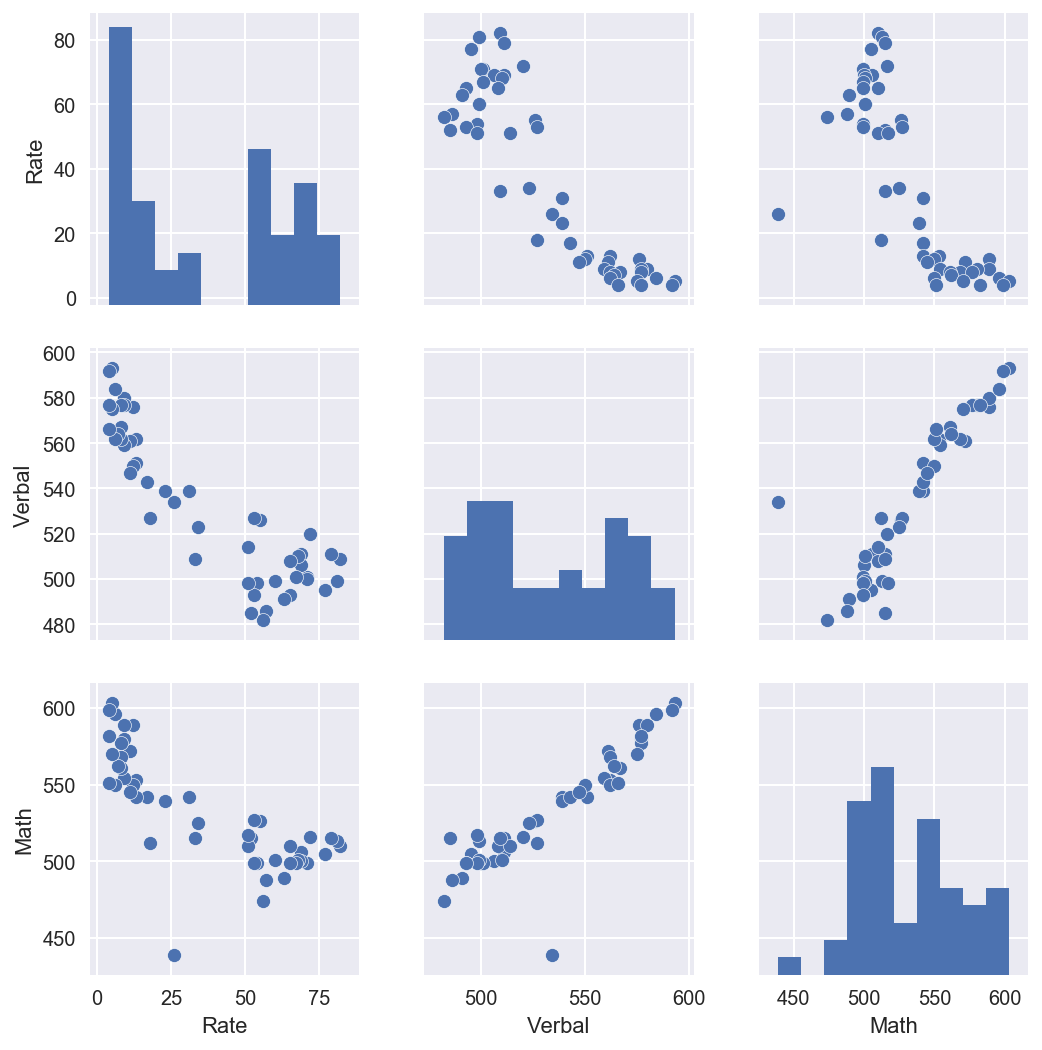

In [12]:
sats1.drop(51, axis=0, inplace=True)

sats1pair = sats1.drop("State", axis=1)
sns.pairplot(sats1pair)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

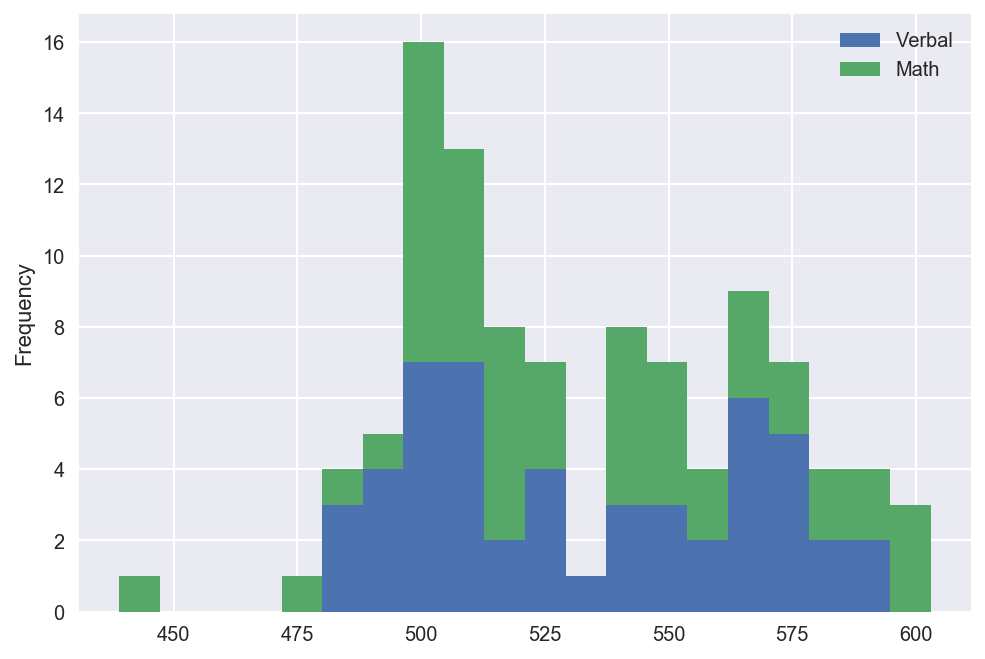

In [13]:
sats2plot = sats1pair.drop("Rate", axis=1)
sats2plot.plot.hist(stacked=True,bins = 20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

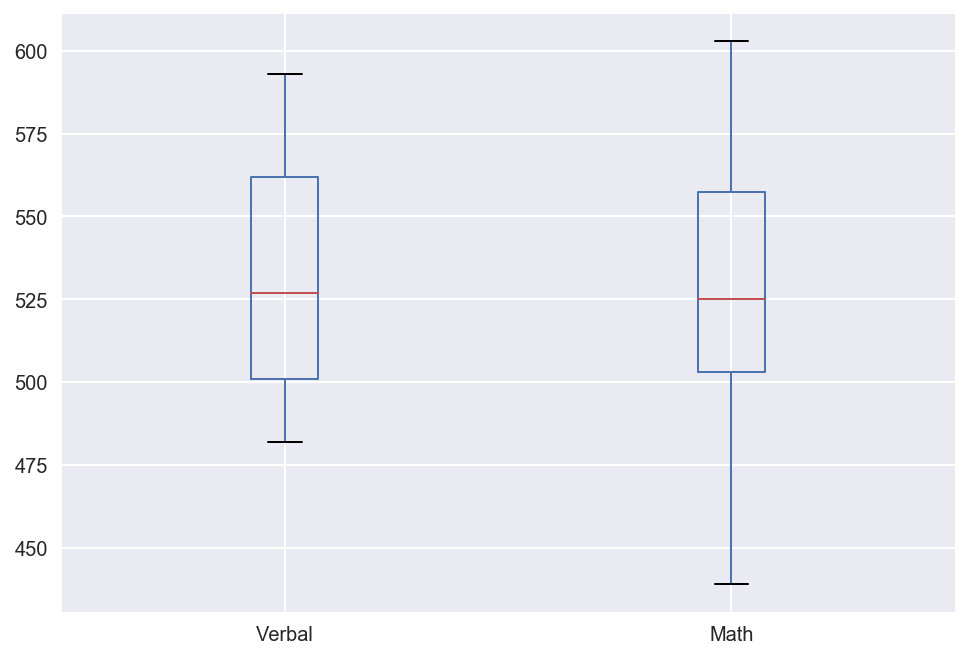

In [14]:
sats3plot = sats1pair.drop("Rate", axis=1)
sats3plot.plot.box()

#scale of rate not lies apart from verbal and math

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


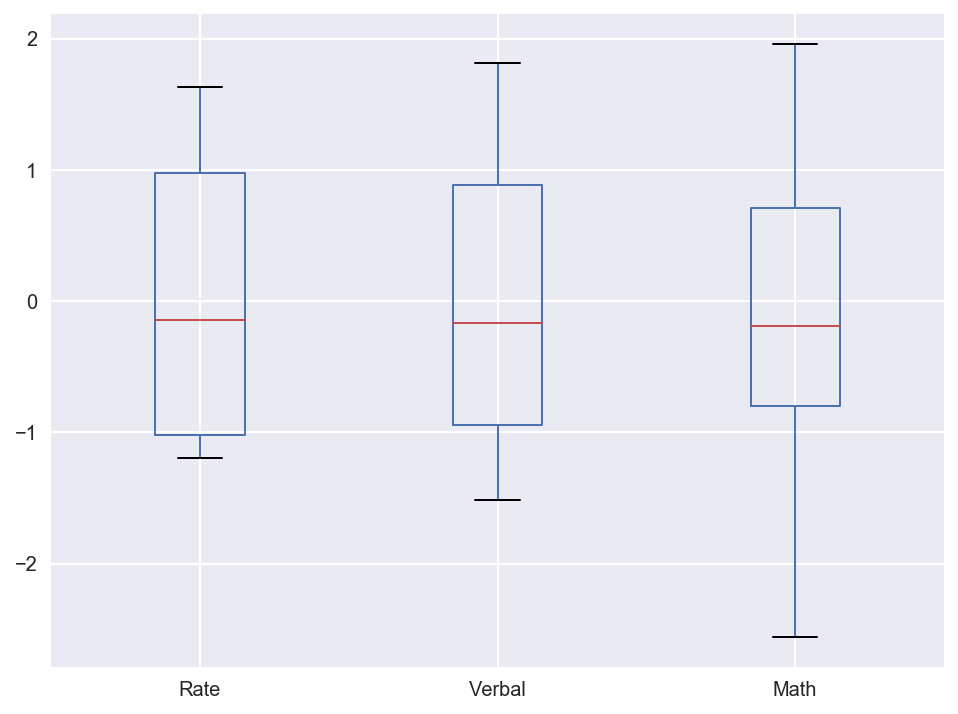

In [15]:
#normalise and plot 

sats1_drop_state = sats1.drop('State', axis=1)
sats1_norm1 = (sats1_drop_state-sats1_drop_state.mean())/sats1_drop_state.std()

sats1_norm1.plot(kind='box', figsize=(8,6))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
verbal_list = sats1.loc[:, "Verbal"].tolist()
verbal_mean = np.mean(verbal_list)

count = 0
states_list_mean = []
for a in range(len(sats1)) :
    if sats1.iloc[a, 3] > verbal_mean :
        count += 1
        states_list_mean.append(sats1.iloc[a, 0])
states_list_mean.sort()
print "No of states above verbal mean :", count
print "States are :", states_list_mean

No of states above verbal mean : 23
States are : ['AL', 'AR', 'CO', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NM', 'OK', 'SD', 'TN', 'UT', 'WI', 'WY']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
verbal_median = np.median(verbal_list)

count = 0
states_list_median = []
for a in range(len(sats1)) :
    if sats1.iloc[a, 3] > verbal_median :
        count += 1
        states_list_median.append(sats1.iloc[a, 0])
states_list_median.sort()

states_list_median

#Mean and median are very close to each other, hence same states are being represented in both mean and median list.

['AL',
 'AR',
 'CO',
 'IA',
 'ID',
 'IL',
 'KS',
 'KY',
 'LA',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'ND',
 'NE',
 'NM',
 'OK',
 'SD',
 'TN',
 'UT',
 'WI',
 'WY']

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
math_list = sats1.loc[:, "Math"].tolist()

math = np.array(math_list)
verbal = np.array(verbal_list)
diff = verbal - math

sats1["Verbal-Math Diff"] = diff
sats1

,State,Rate,Verbal,Math,Verbal-Math Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
top10vm_diff = sats1.sort_values("Verbal-Math Diff", axis=0, ascending=False)    
top10vm_diff.reset_index(inplace=True, drop=True)
top10vm_diff = top10vm_diff.loc[:9,:]
top10vm_diff

,State,Rate,Verbal,Math,Verbal-Math Diff
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,TN,13,562,553,9
5,VA,68,510,501,9
6,NM,13,551,542,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


In [20]:
top10vm_diff1 = sats1.sort_values("Verbal-Math Diff", axis=0)
top10vm_diff1.reset_index(inplace=True, drop=True)
top10vm_diff1 = top10vm_diff1.loc[:9,:]
top10vm_diff1

,State,Rate,Verbal,Math,Verbal-Math Diff
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14
3,IL,12,576,589,-13
4,WI,6,584,596,-12
5,MI,11,561,572,-11
6,NY,77,495,505,-10
7,IA,5,593,603,-10
8,MN,9,580,589,-9
9,ND,4,592,599,-7


In [21]:
print top10vm_diff1.head(3)


  State  Rate  Verbal  Math  Verbal-Math Diff
0    HI    52     485   515               -30
1    CA    51     498   517               -19
2    NJ    81     499   513               -14


In [22]:
print top10vm_diff.head(3)

  State  Rate  Verbal  Math  Verbal-Math Diff
0    OH    26     534   439                95
1    MS     4     566   551                15
2    WV    18     527   512                15


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [23]:
sats1.corr()

,Rate,Verbal,Math,Verbal-Math Diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal-Math Diff,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [24]:
sats1.describe()

,Rate,Verbal,Math,Verbal-Math Diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [25]:
sats1.cov()

,Rate,Verbal,Math,Verbal-Math Diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal-Math Diff,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [26]:
path = "/Users/Naren/GitHub/datascience/Projects/Week2/drug-use-by-age.csv"
druguse = pd.read_csv(path)
druguse

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [83]:
print druguse.shape
print '\n'
print druguse.info()
print '\n'
druguse

(17, 28)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


    alcohol-frequency  marijuana-frequency cocaine-frequency crack-frequency  \
0                 3.0                  4.0               5.0               -   
1                 6.0                 15.0               1.0             3.0   
2                 5.0                 24.0               5.5               -   
3                 6.0                 25.0               4.0             9.5   
4                10.0                 30.0               7.0             1.0   
5                13.0                 36.0               5.0            21.0   
6                24.0                 52.0               5.0            10.0   
7                36.0                 60.0               5.5             2.0   
8                48.0                 60.0               8.0             5.0   
9                52.0                 52.0               5.0            17.0   
10               52.0                 52.0               5.0             5.0   
11               52.0                 60

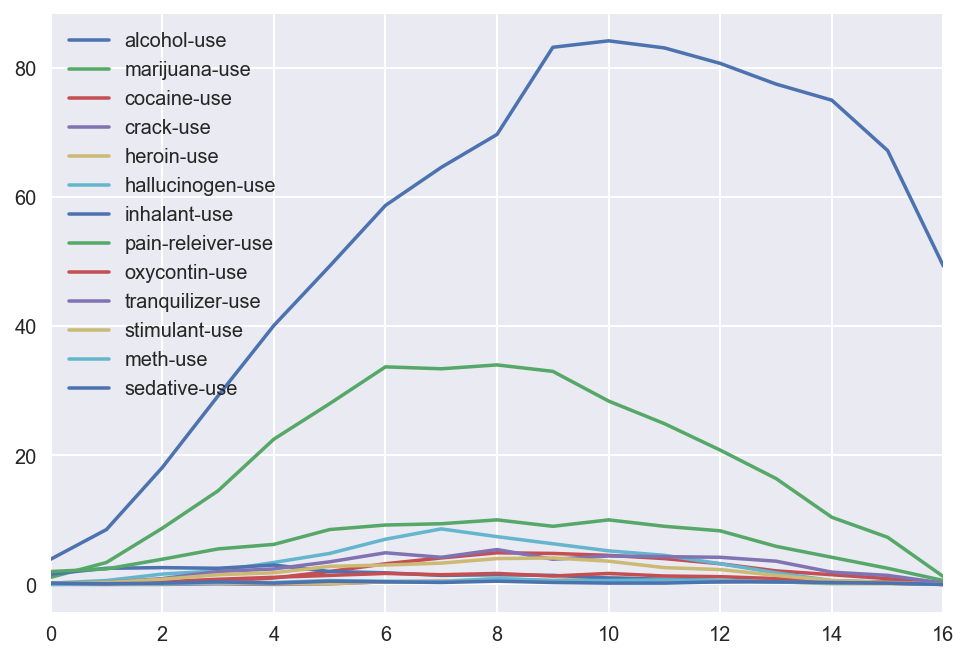

In [97]:
tot_col = druguse.shape[1]

usage_range = range(2, tot_col, 2)
frequency_range = range(3, tot_col, 2)

usage = pd.DataFrame(druguse.iloc[:, usage_range])
freq = pd.DataFrame(druguse.iloc[:, frequency_range])
age = np.array(druguse.iloc[:, 0])
last = pd.DataFrame(druguse.iloc[:, 1])

print freq

usage.plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
alcohol-frequency          17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-frequency          17 non-null float64
crack-frequency            17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-frequency        17 non-null float64
tranquilizer-frequency     17 non-null float64
stimulant-frequency        17 non-null float64
meth-frequency             17 non-null float64
sedative-frequency         17 non-null float64
dtypes: float64(13)
memory usage: 1.8 KB


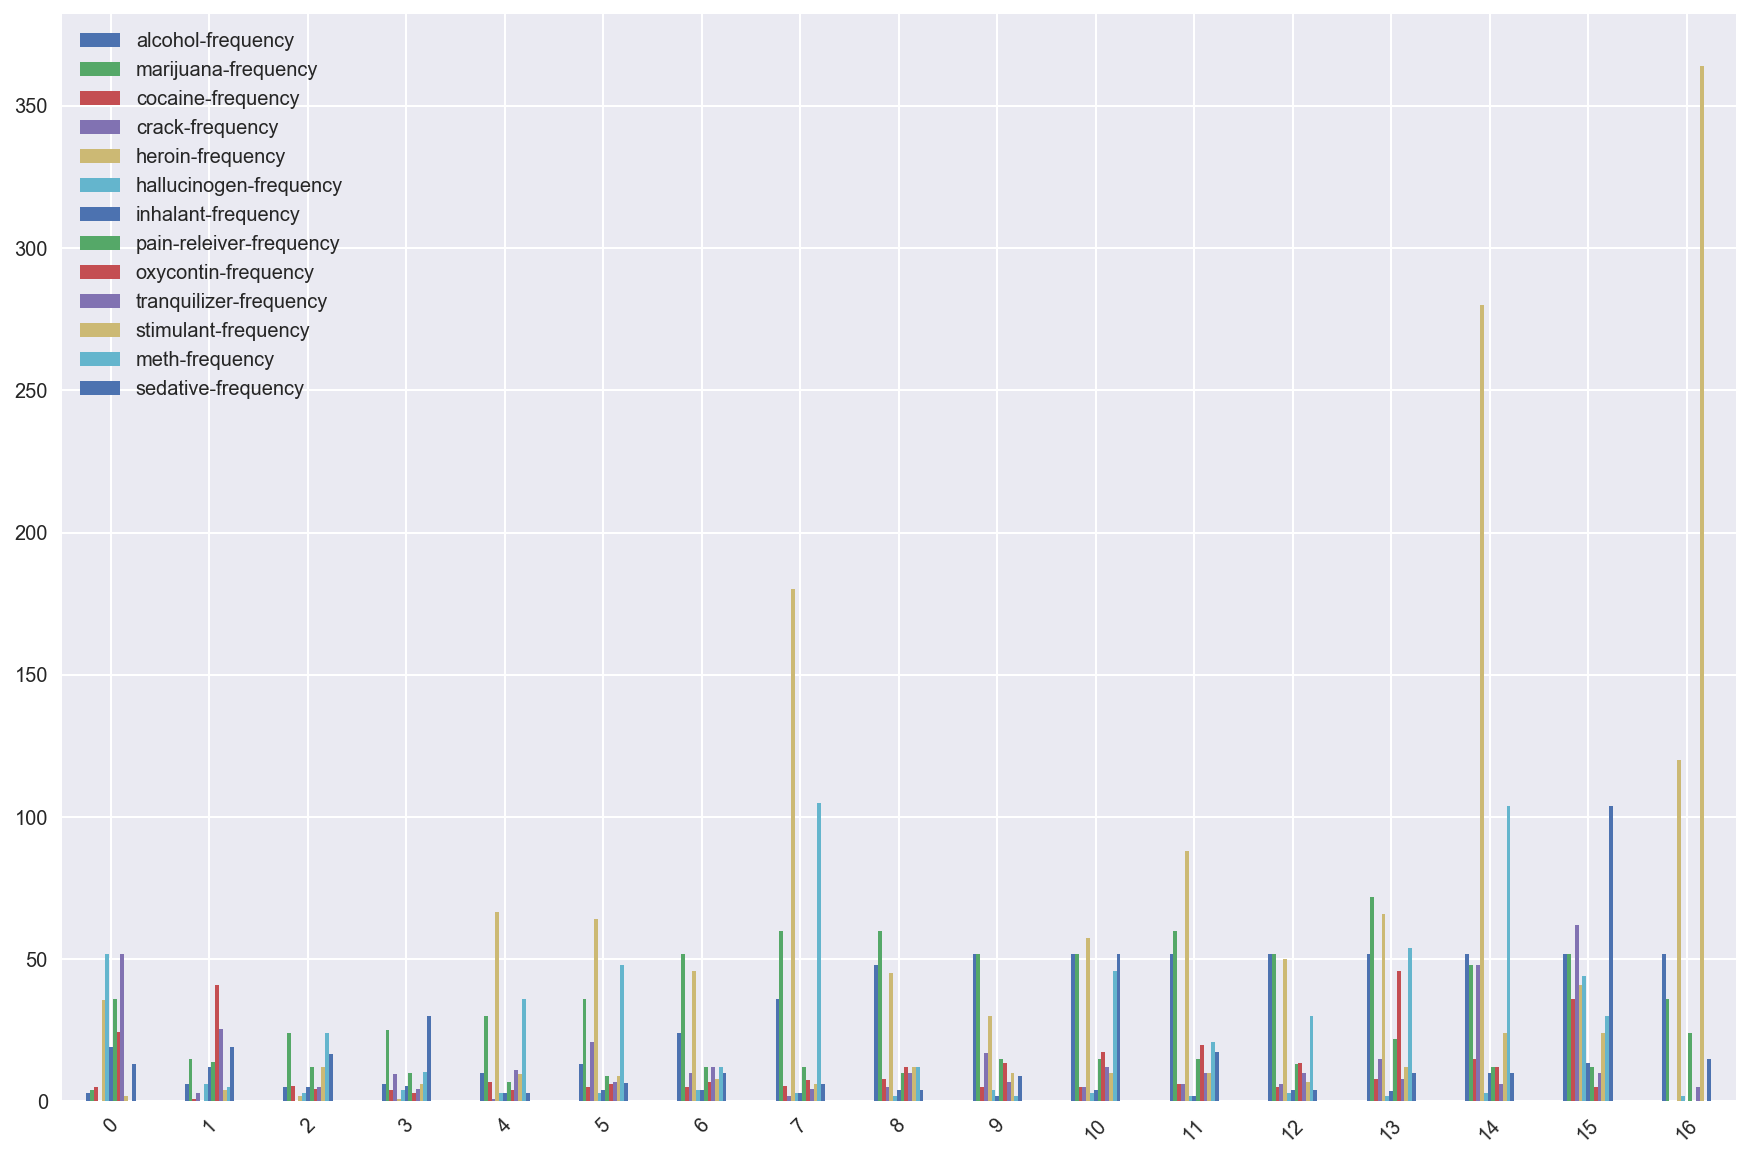

In [63]:
#change - to 0 , else like me you will spend 15 mins wondering why you can plot but columns disappeared 
#also doesnt throw an error or warning

freq.replace({'-': 0}, inplace=True)

#change columntype to float

freq = freq.astype(float)

#print freq

freq.info()
#plotting drug freq


freq.plot(figsize=(15,10), kind='bar', stacked=False, rot=45)

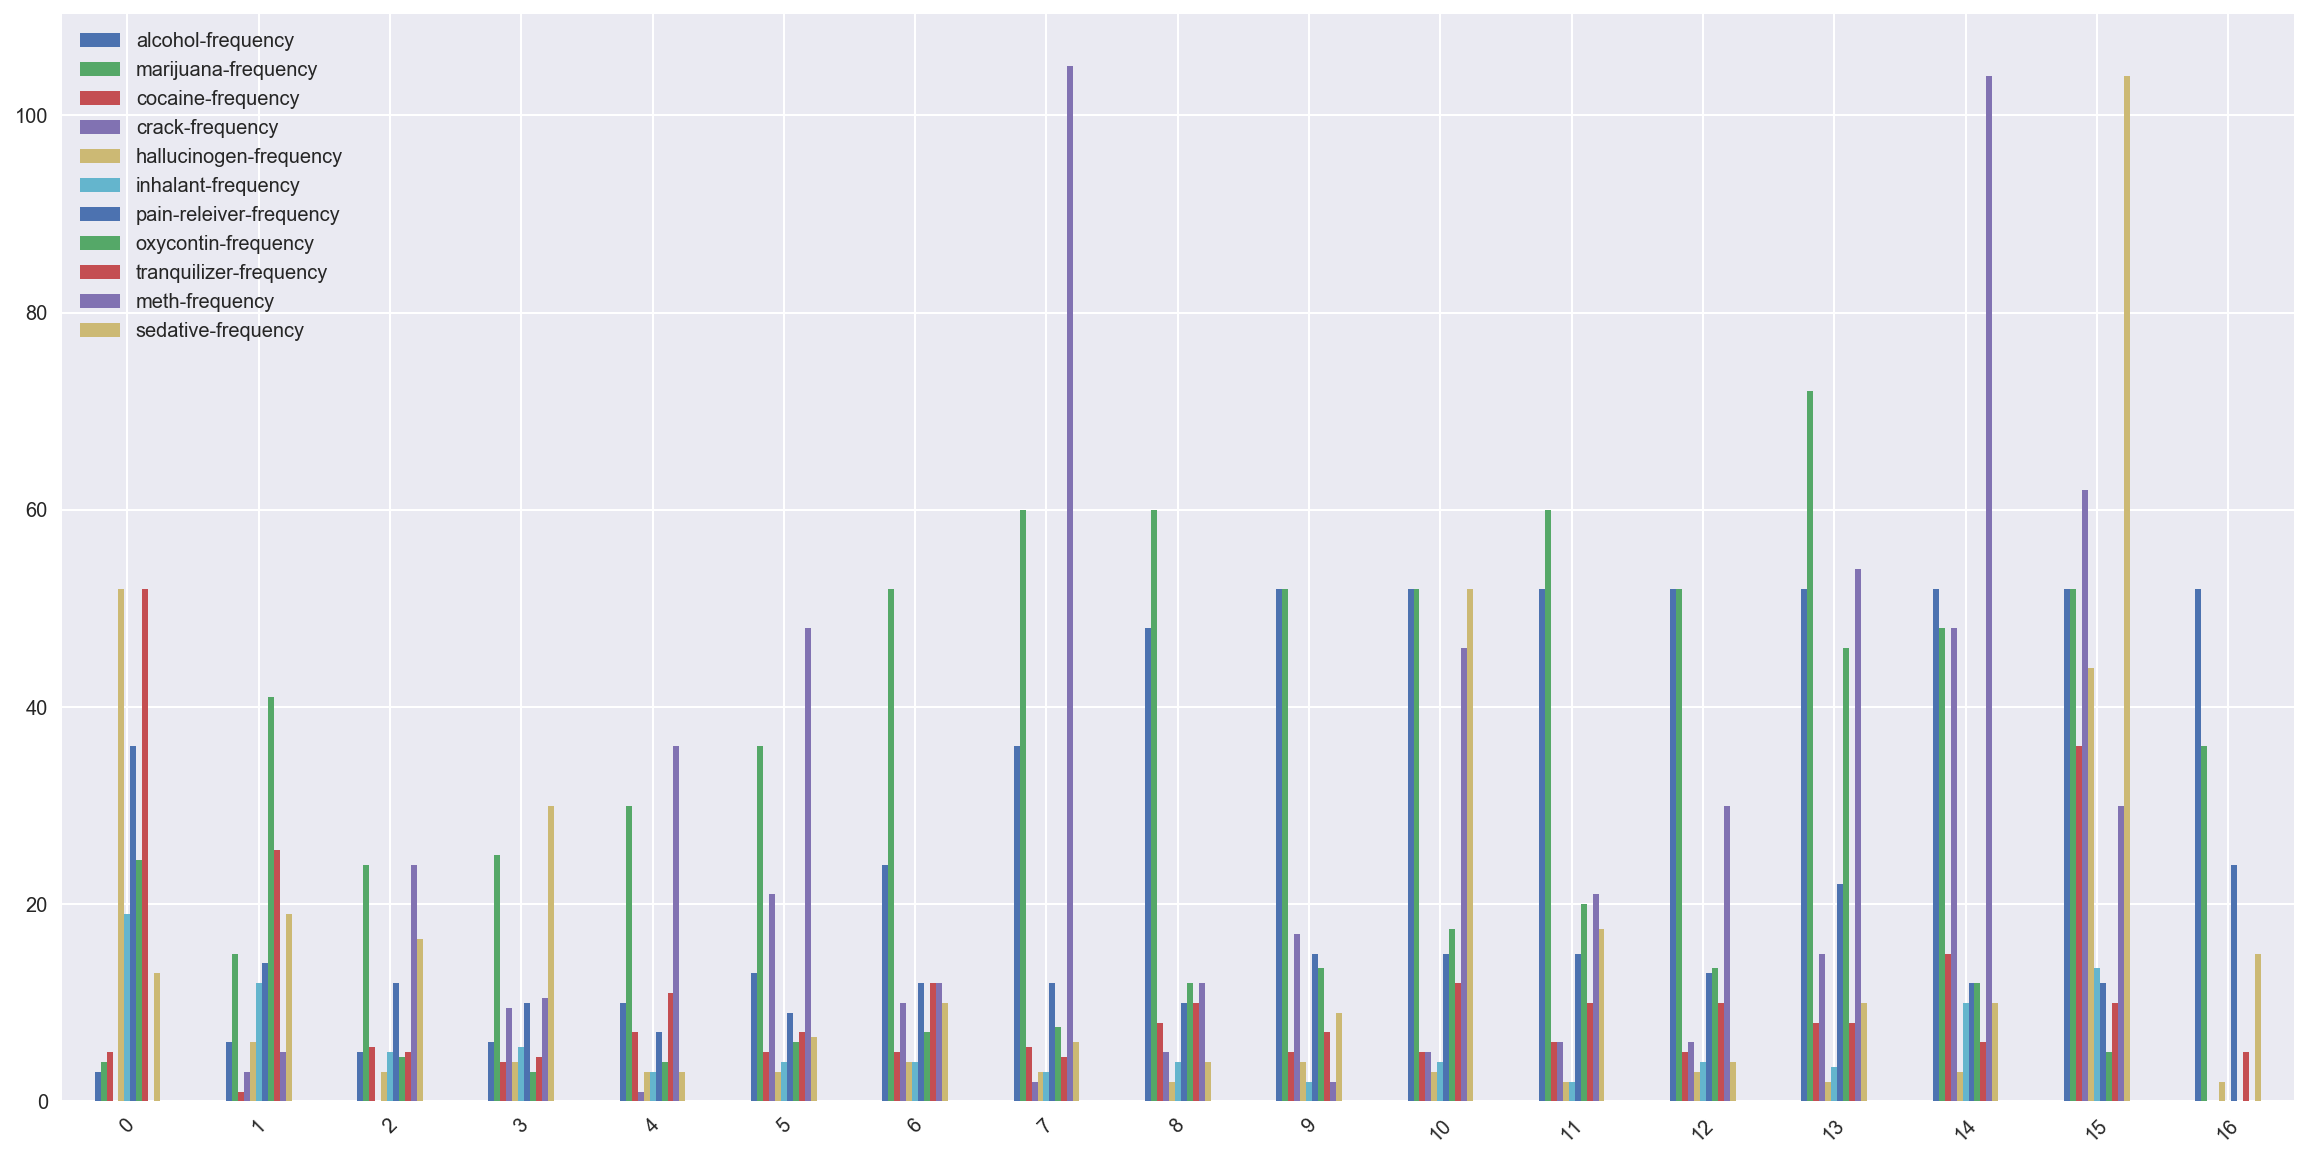

In [30]:
freq.drop(["heroin-frequency", "stimulant-frequency"], axis=1).plot(figsize=(20,10),kind='bar', stacked=False, rot=45)

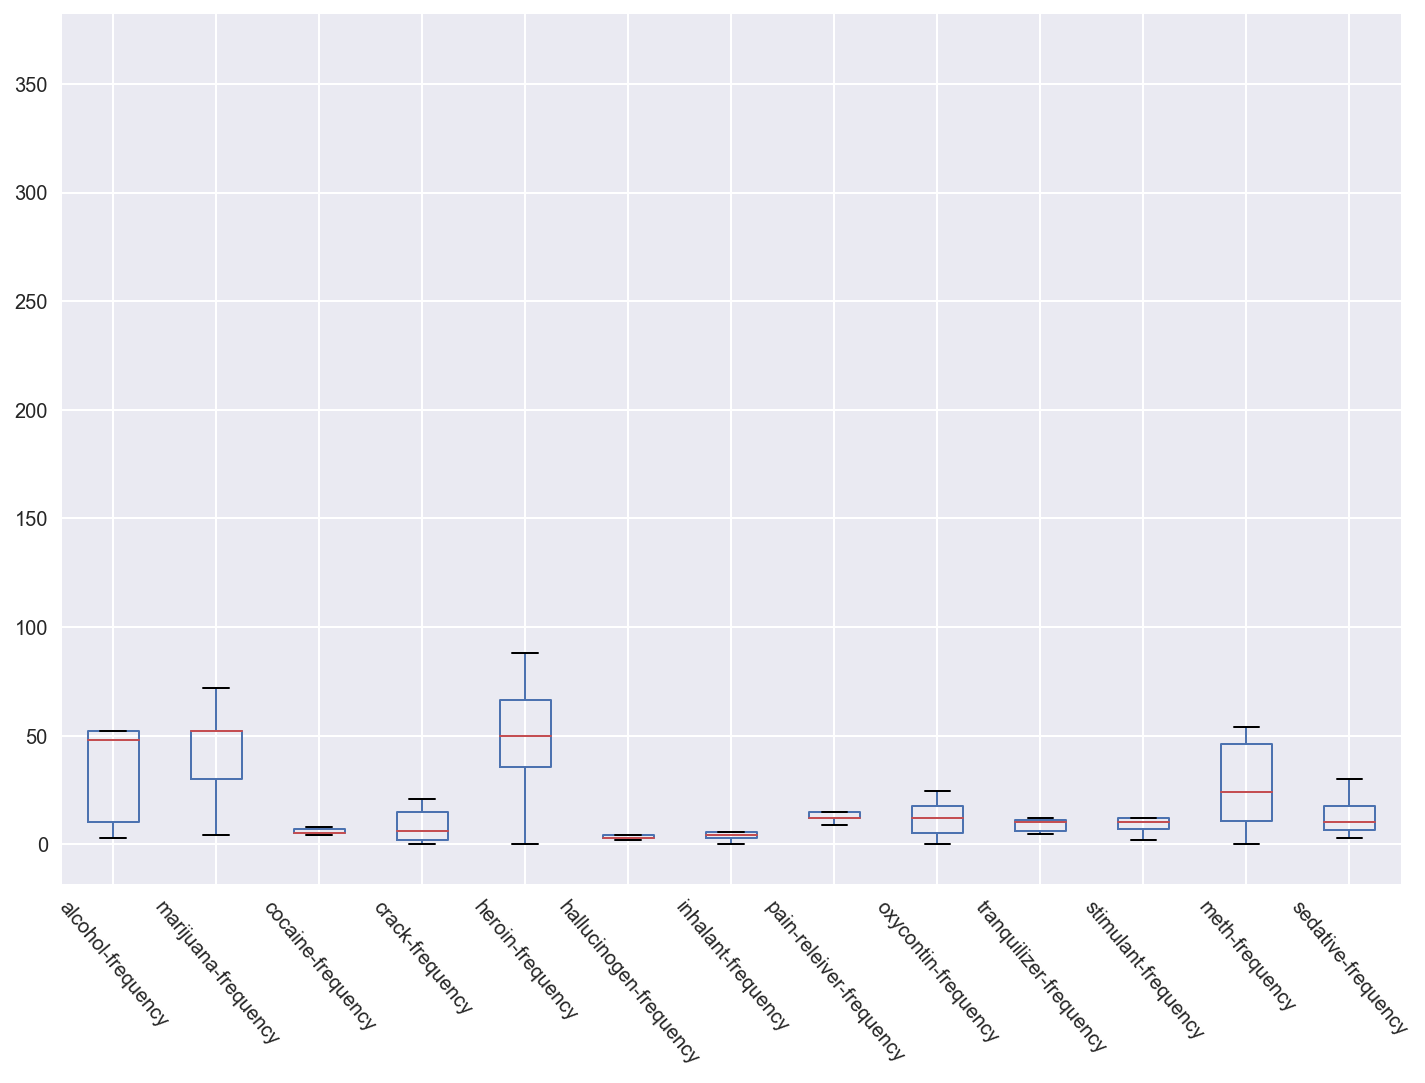

In [31]:
freq.plot(kind='box', figsize=(12,8), rot=-50)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [54]:
#do later
check_freq = freq.corr()

#print check_freq
check_freq

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
alcohol-frequency,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana-frequency,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine-frequency,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack-frequency,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin-frequency,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen-frequency,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant-frequency,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain-releiver-frequency,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin-frequency,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer-frequency,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


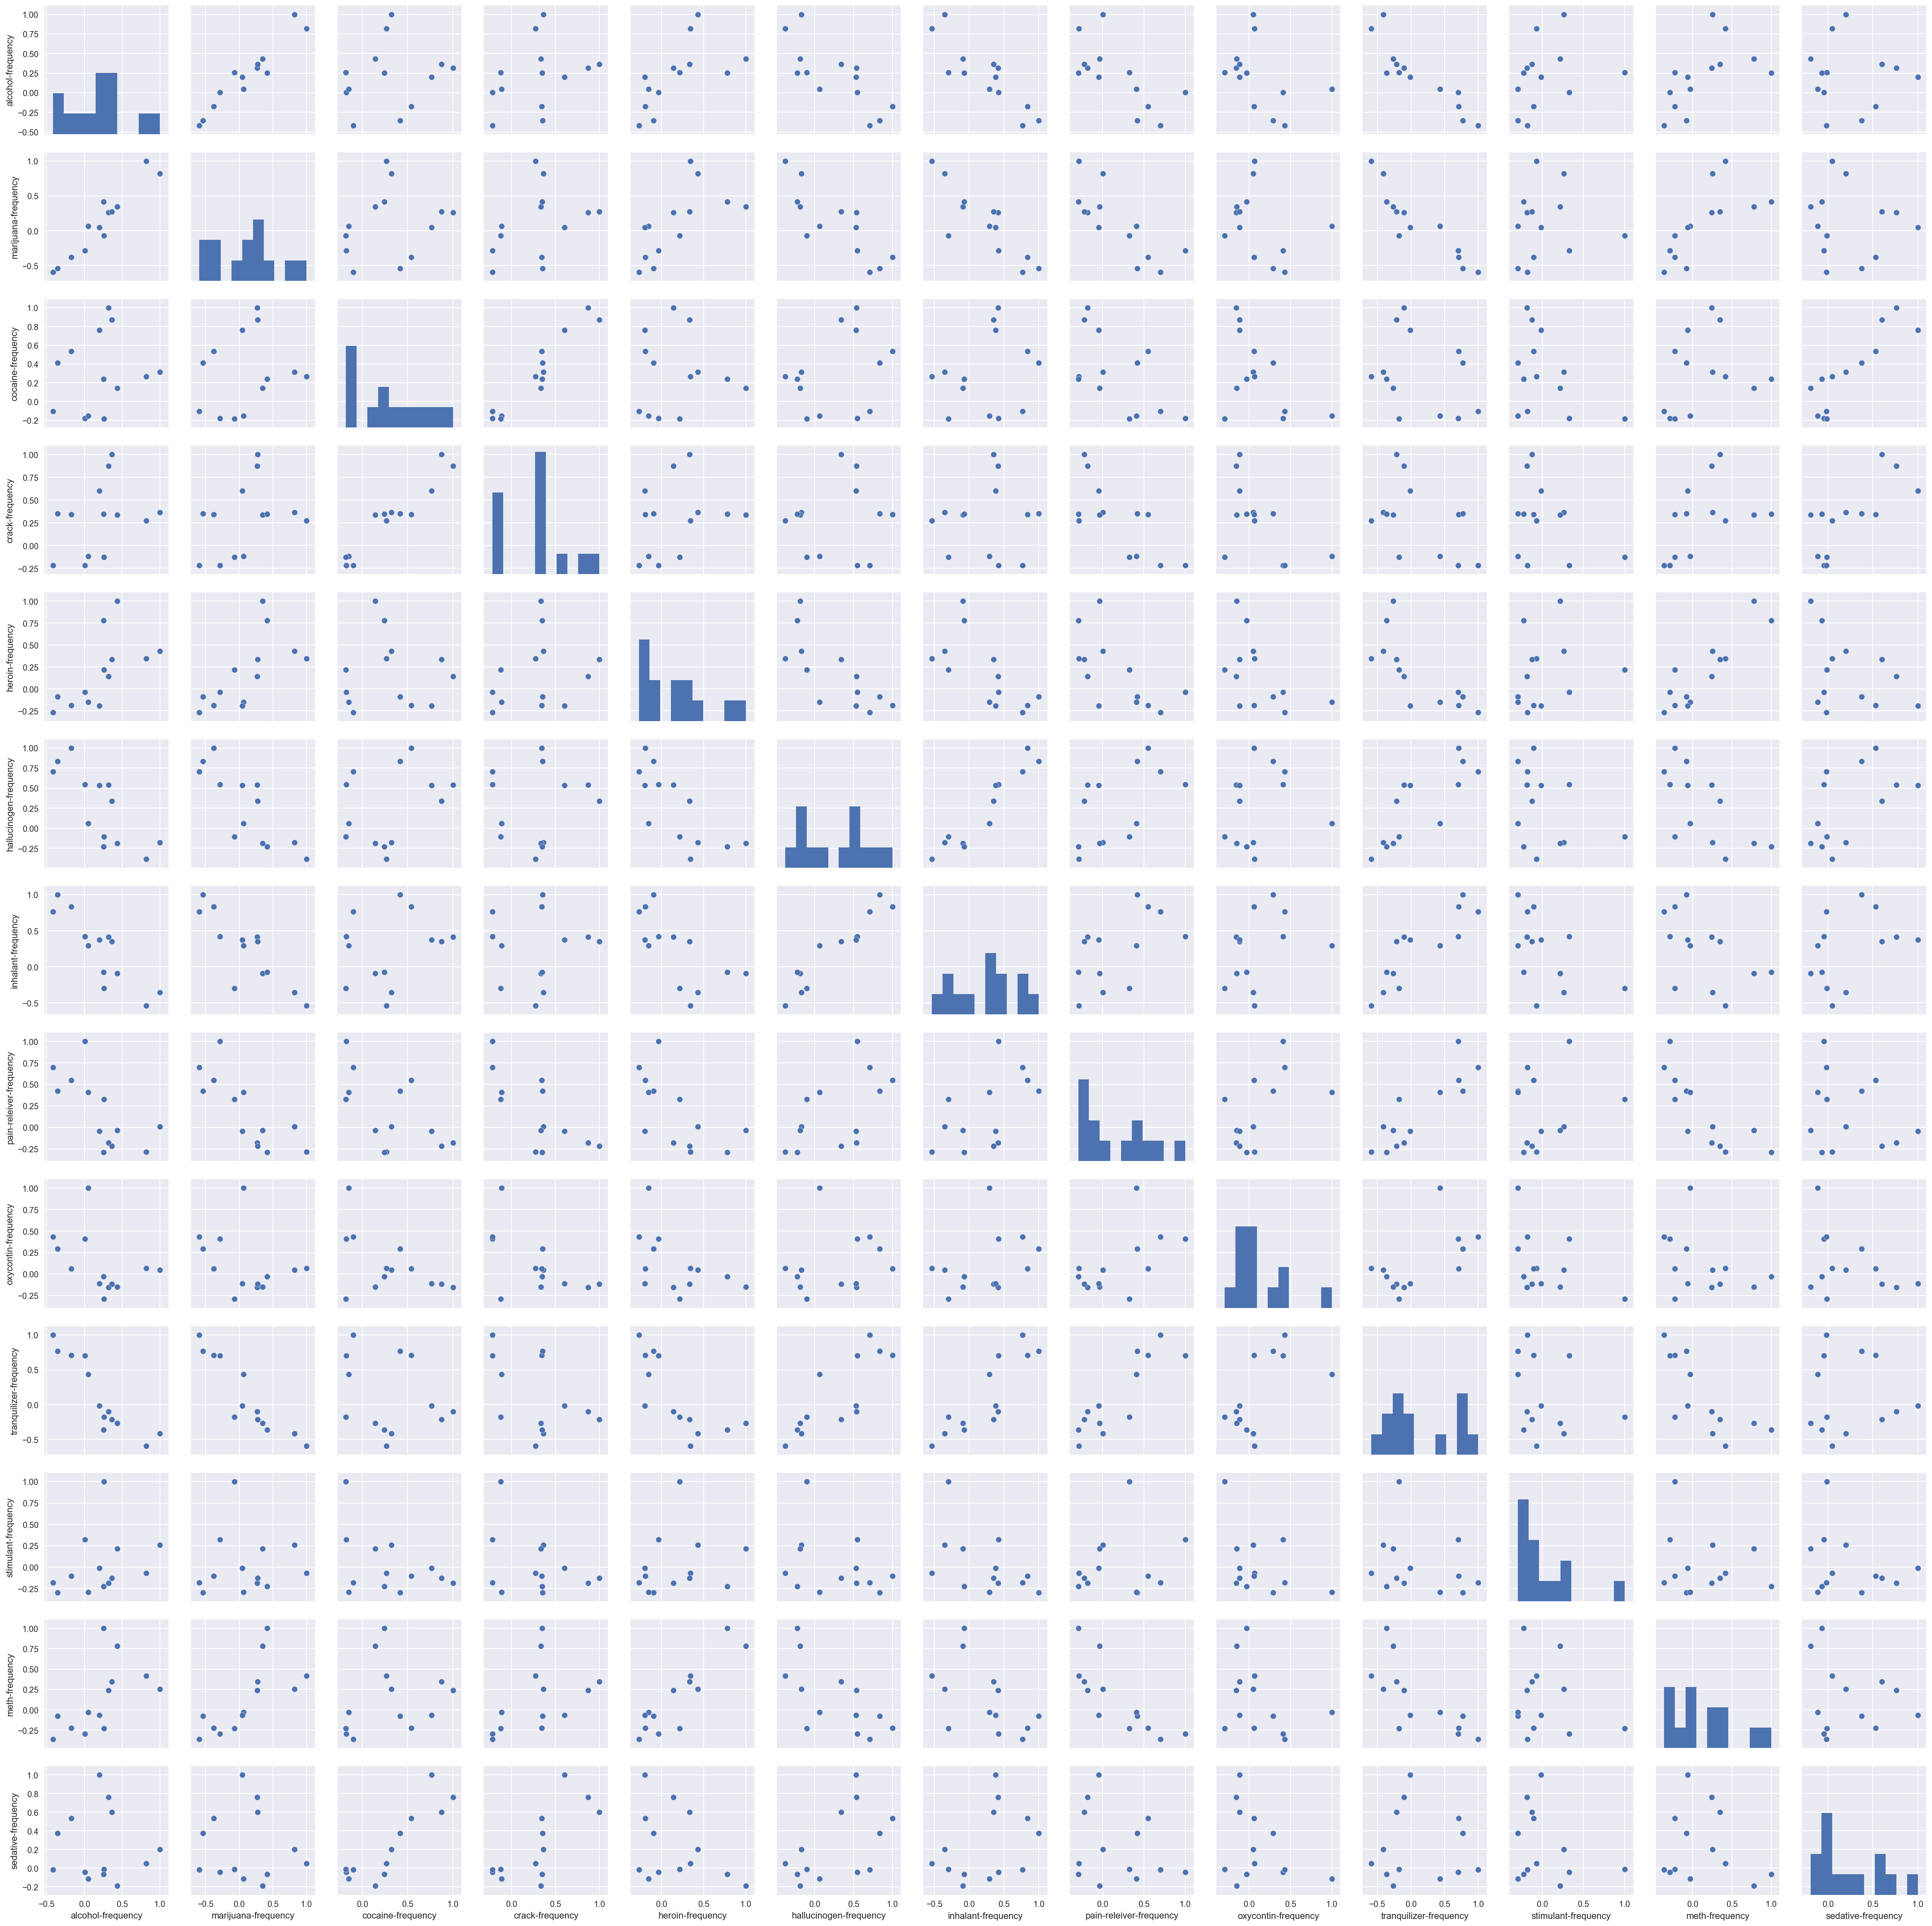

In [42]:
import seaborn as sns;
sns.pairplot(check_freq, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)

In [51]:
a = []
for value in check_freq:
    print check_freq.loc[check_freq[value] > 0.8,value]

    
        

#indices = [(freq.index[x], freq.columns[y]) for x, y in zip(*indices)
                                      #  if x != y and x < y]

alcohol-frequency      1.000000
marijuana-frequency    0.818769
Name: alcohol-frequency, dtype: float64
alcohol-frequency      0.818769
marijuana-frequency    1.000000
Name: marijuana-frequency, dtype: float64
cocaine-frequency    1.00000
crack-frequency      0.87226
Name: cocaine-frequency, dtype: float64
cocaine-frequency    0.87226
crack-frequency      1.00000
Name: crack-frequency, dtype: float64
heroin-frequency    1.0
Name: heroin-frequency, dtype: float64
hallucinogen-frequency    1.000000
inhalant-frequency        0.834993
Name: hallucinogen-frequency, dtype: float64
hallucinogen-frequency    0.834993
inhalant-frequency        1.000000
Name: inhalant-frequency, dtype: float64
pain-releiver-frequency    1.0
Name: pain-releiver-frequency, dtype: float64
oxycontin-frequency    1.0
Name: oxycontin-frequency, dtype: float64
tranquilizer-frequency    1.0
Name: tranquilizer-frequency, dtype: float64
stimulant-frequency    1.0
Name: stimulant-frequency, dtype: float64
meth-frequency   

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

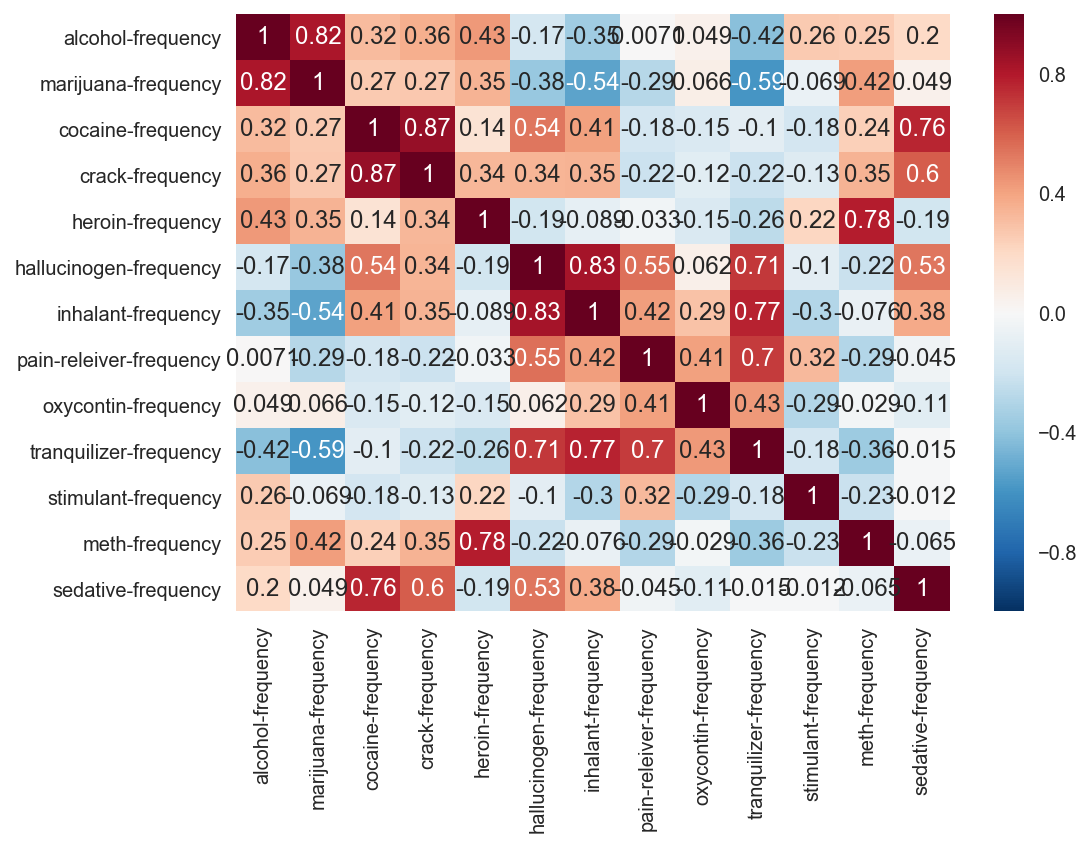

In [55]:
# Code
H0 : There exist "Crossfade" drug abusers . {People who intentionally abuse certain "combo" drugs}
H1 : There exists no "Crossfade" drug abusers.
    
Correlated 

check_freq = freq.corr()

sns.heatmap(check_freq,annot=True)

**Report**

Hypothesis not conclusive without knowing if both abuse happened simultaneouly.. There exists >0.8 positive correlation between certain types of drug use.

Case 1 : People who drink, have high marijuana use (0.82)
    Alcohol intensifies THC effect, THC helps absorb alcohol quicker

Case 2 : People who smoke crack, snort/ shoot cocaine 
     Acquire crack from cutting cocaine, high likelyhood due to time constraint 

Case 3 : Meth (Stimulant) with Heroin (Opiate) - > enhances effect of both drugs , produces a higher high.
    Meth high longer than Heroin. 
    $200 per gram (Heroin), $20 per gram (Meth) #HAHA WE HAVE FINANCIALLY PRUDENT DRUG ABUSERS

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

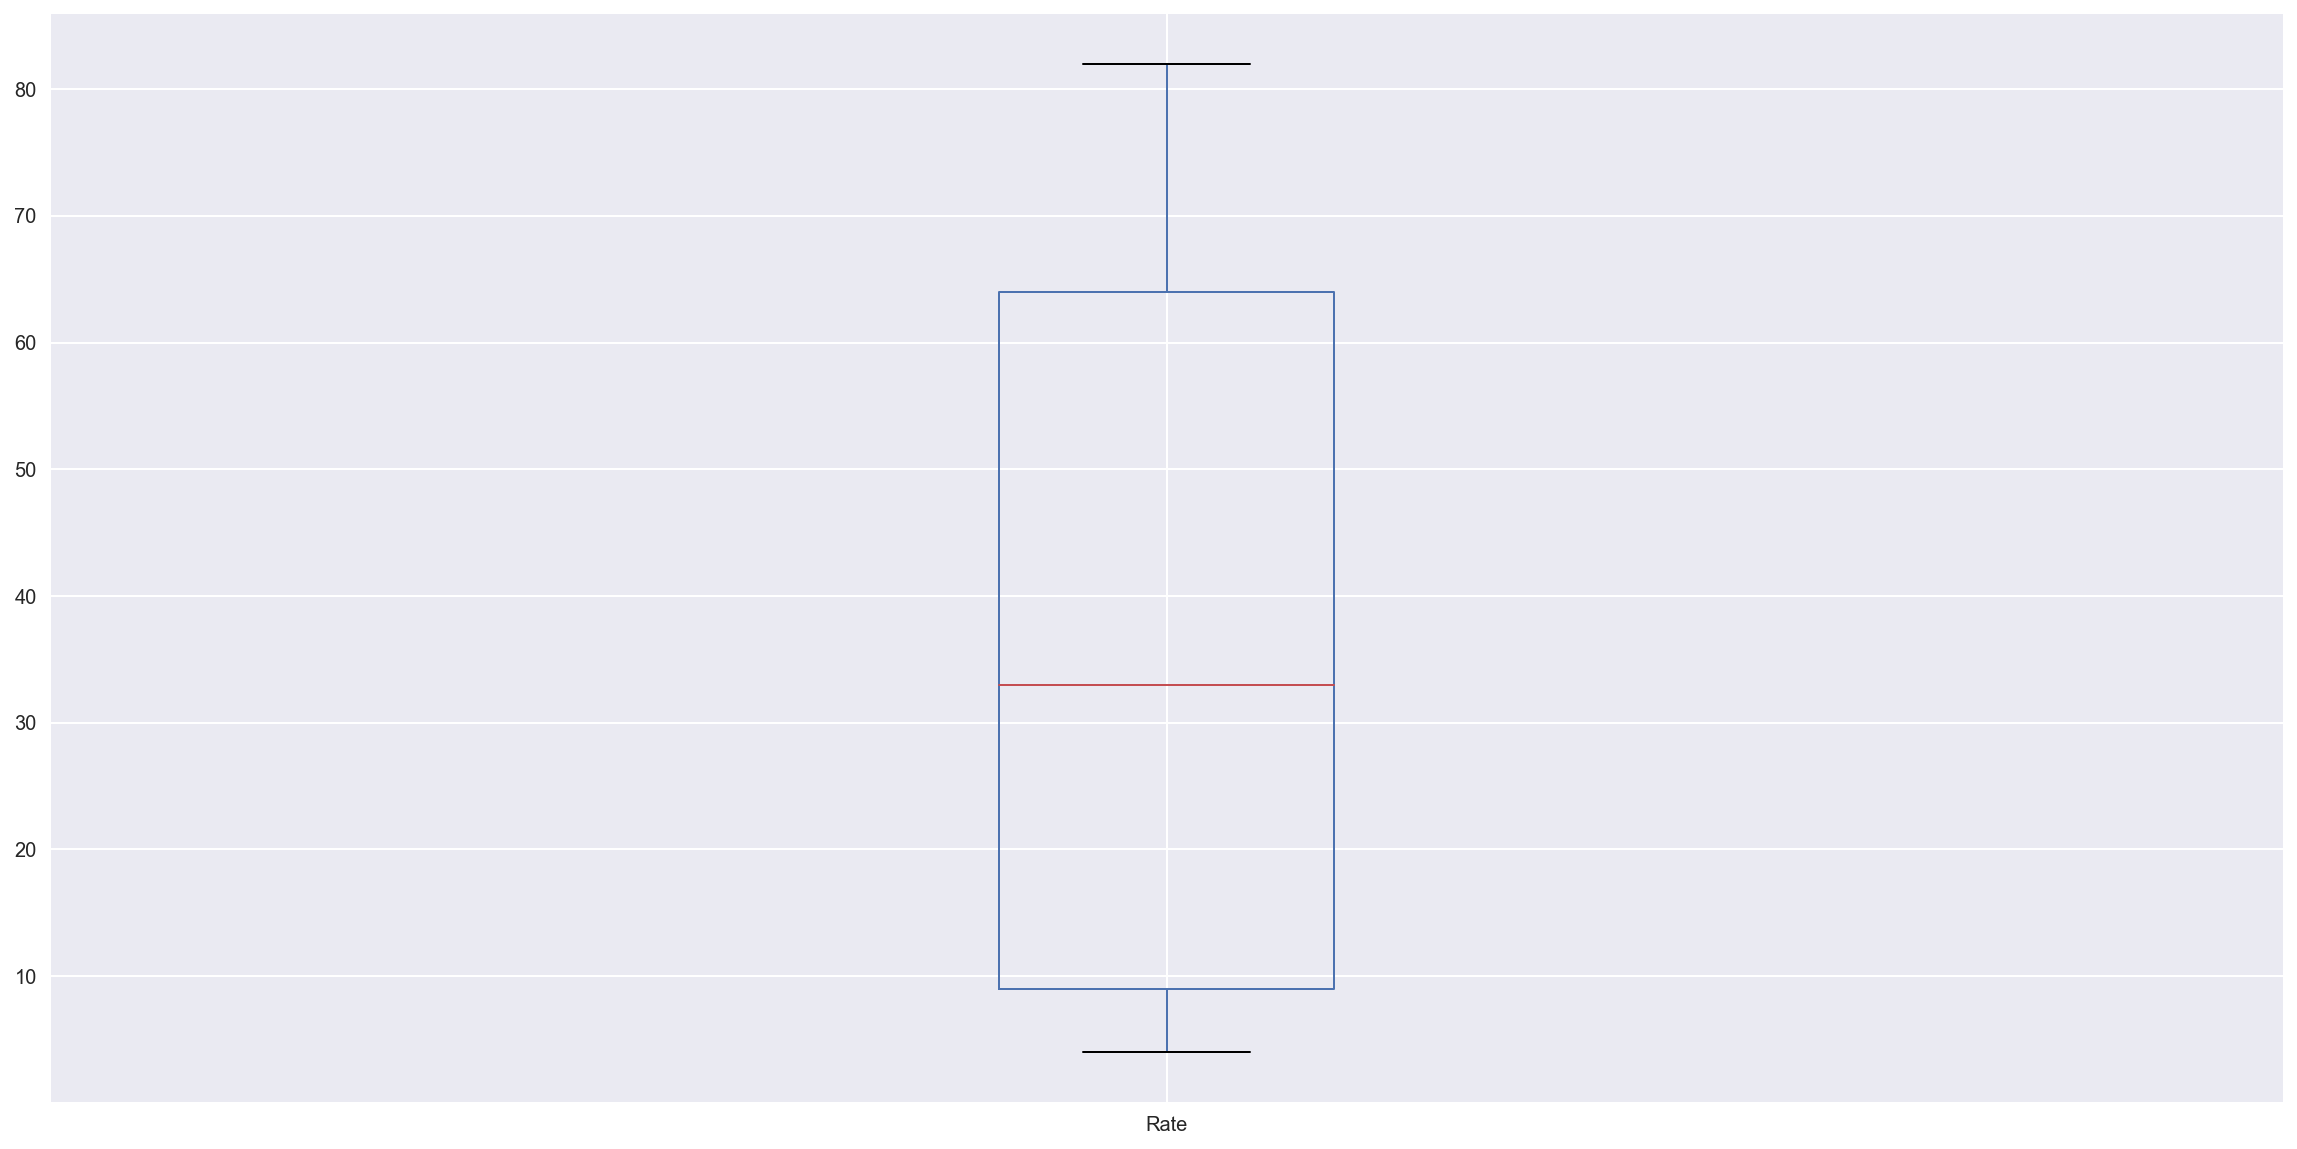

In [77]:
# QR = 75th - 25th percentile or the Interquartile range

only_rate= sats1.drop(["Verbal","Math","Verbal-Math Diff","rate_percentile","State"],axis=1)

only_rate.plot(figsize=(20,10),kind='box',stacked=False)

#no real outliers

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [67]:
sats_clean = sats1.drop(["Rate", "Verbal-Math Diff"], axis=1)
pearson_val = np.corrcoef(sats_clean["Verbal"], sats_clean["Math"])[0, 1]
spearman_val = stats.spearmanr(sats_clean["Verbal"], sats_clean["Math"])

print pearson_val, '\n'
print spearman_val, '\n'


0.899909318181 

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20) 



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [65]:
#rate to percentile

rate = np.array(sats1["Rate"])
rate_percent = []

for value in rate :
    rate_convert = round(stats.percentileofscore(rate, value), 2)
    rate_percent.append(rate_convert)
    
sats1["rate_percentile"] = rate_percent
sats1

,State,Rate,Verbal,Math,Verbal-Math Diff,rate_percentile
0,CT,82,509,510,-1,100.00
1,NJ,81,499,513,-14,98.04
2,MA,79,511,515,-4,96.08
3,NY,77,495,505,-10,94.12
4,NH,72,520,516,4,92.16
5,RI,71,501,499,2,89.22
6,PA,71,500,499,1,89.22
7,VT,69,511,506,5,85.29
8,ME,69,506,500,6,85.29
9,VA,68,510,501,9,82.35


Both spearman and rate percentile give values according to the ranking of the values from highest to lowerst. by looking at the size of the value relative to its peers, we can gauge their pearson values if we know a similar/nearby value.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [80]:
usage

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


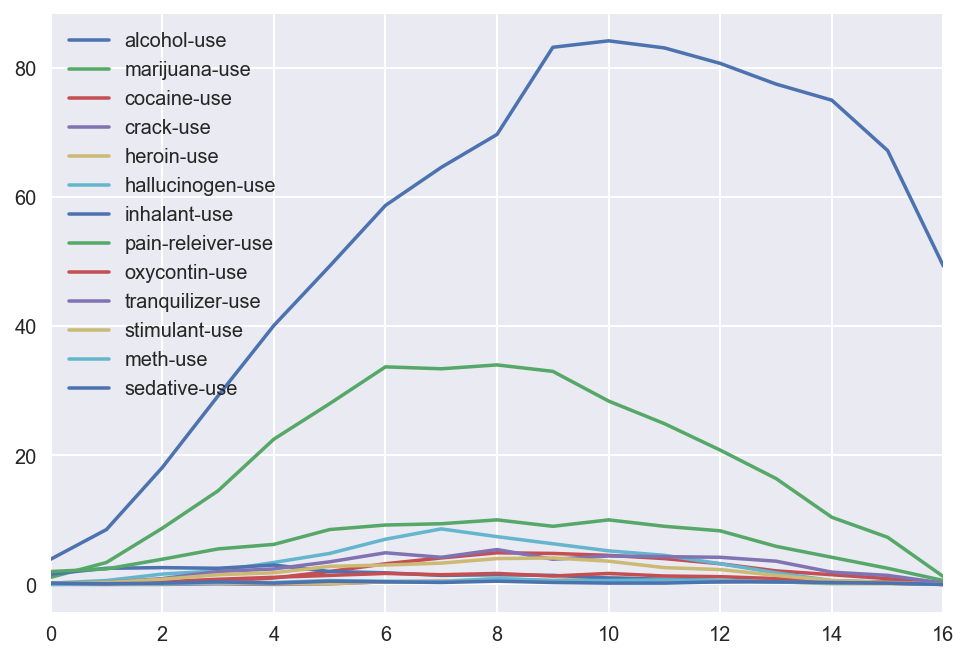

In [90]:
usage.plot()

In [93]:
for n in usage:
    n = n/sum(n)

usage.plot()

TypeError: unsupported operand type(s) for +: 'int' and 'str'